# Python機械学習クックブック

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing

from keras import models
from keras import layers
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from keras_preprocessing.image import ImageDataGenerator

## ニューラルネットワークのためのデータ前処理

In [5]:
features = np.array(
    [
        [-100.1, 3240.1],
        [-200.2, -234.1],
        [5000.5, 150.1],
        [6000.6, -125.1],
        [9000.9, -673.1],
    ]
)

# 標準化器を作成
scaler = preprocessing.StandardScaler()

# 特徴量を変換
features_standardized = scaler.fit_transform(features)

# 特徴量を表示
print(features_standardized)

# 平均と標準偏差を表示
print("Mean:", round(features_standardized[:, 0].mean()))
print("Standard deviation:", features_standardized[:, 0].std())


[[-1.12541308  1.96429418]
 [-1.15329466 -0.50068741]
 [ 0.29529406 -0.22809346]
 [ 0.57385917 -0.42335076]
 [ 1.40955451 -0.81216255]]
Mean: 0
Standard deviation: 0.9999999999999999


## ニューラルネットワークの設計

In [7]:
network = models.Sequential()

# 10個のユニットを持つ全結合層を追加
network.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))

# 活性化関数を指定して全結合層を追加
network.add(layers.Dense(units=16, activation="relu"))

# シグモイド関数を指定して全結合層を追加
network.add(layers.Dense(units=1, activation="sigmoid"))

# ニューラルネットワークの概要を表示
network.summary()

# ニューラルネットワークのコンパイル
network.compile(loss="binary_crossentropy", # 交差エントロピー誤差
                optimizer="rmsprop", # 最適化アルゴリズム
                metrics=["accuracy"]) # 性能指標

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


## 訓練経過の可視化

Epoch 1/3
250/250 [==============================] - 3s 11ms/step - loss: 0.3576 - accuracy: 0.8580 - val_loss: 0.2782 - val_accuracy: 0.8889
Epoch 2/3
250/250 [==============================] - 2s 7ms/step - loss: 0.2103 - accuracy: 0.9200 - val_loss: 0.2951 - val_accuracy: 0.8846
Epoch 3/3
250/250 [==============================] - 2s 7ms/step - loss: 0.1710 - accuracy: 0.9368 - val_loss: 0.3273 - val_accuracy: 0.8764


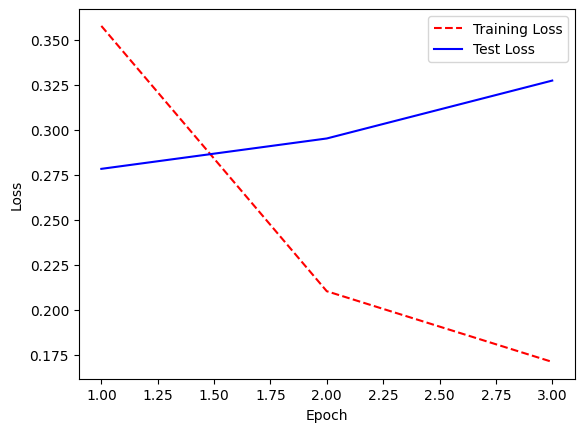

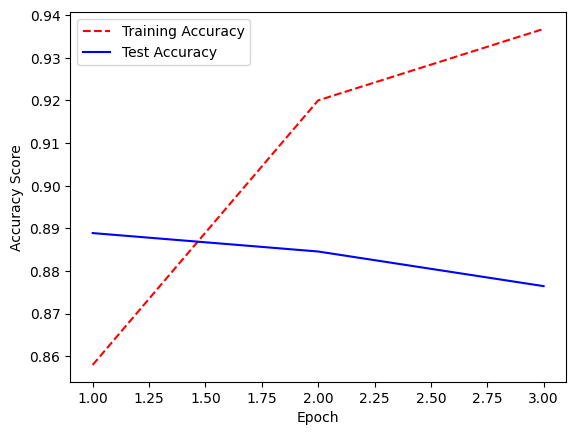

In [11]:
# 乱数シードを設定
np.random.seed(0)

# 利用したい特徴量の数を指定
number_of_features = 10000

# 映画データの特徴量とターゲットベクトルをロード
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features
)

# 映画データの特徴量をone-hotエンコードして特徴量行列を作成
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# ニューラルネットワークの作成
network = models.Sequential()

# 全結合層を追加
network.add(
    layers.Dense(
        units=16, activation="relu", input_shape=(number_of_features,)
    )
)

# 全結合層を追加
network.add(layers.Dense(units=16, activation="relu"))

# 全結合層を追加
network.add(layers.Dense(units=1, activation="sigmoid"))

# ニューラルネットワークのコンパイル
network.compile(
    loss="binary_crossentropy",  # 交差エントロピー誤差
    optimizer="rmsprop",  # 最適化アルゴリズム
    metrics=["accuracy"],
)  # 性能指標

# ニューラルネットワークの訓練
history = network.fit(
    features_train,  # 特徴量
    target_train,  # ターゲットベクトル
    epochs=3,  # エポック数
    verbose=1,  # 進捗状況の表示
    batch_size=100,  # バッチごとの観測値数
    validation_data=(features_test, target_test),
)  # テストデータ

# 訓練ロスとテストロスの履歴を取得
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# エポック数を取得
epoch_count = range(1, len(training_loss) + 1)

# 損失の履歴をプロット
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


# 訓練精度とテスト精度の履歴を取得
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

# エポック数を取得
epoch_count = range(1, len(training_accuracy) + 1)

# 損失の履歴をプロット
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")

plt.show()

## モデル訓練の進捗状況セーブ

In [16]:
# 乱数シードを設定
np.random.seed(0)

# 利用したい特徴量の数を指定
number_of_features = 1000

# 映画データの特徴量とターゲットベクトルをロード
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features
)

# 映画データの特徴量をone-hotエンコードして特徴量行列を作成
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# ニューラルネットワークの作成
network = models.Sequential()

# 全結合層を追加
network.add(
    layers.Dense(
        units=16, activation="relu", input_shape=(number_of_features,)
    )
)

# 全結合層を追加
network.add(layers.Dense(units=16, activation="relu"))

# 全結合層を追加
network.add(layers.Dense(units=1, activation="sigmoid"))

# ニューラルネットワークのコンパイル
network.compile(
    loss="binary_crossentropy",  # 交差エントロピー誤差
    optimizer="rmsprop",  # 最適化アルゴリズム
    metrics=["accuracy"],
)  # 性能指標

# チェックポイント取るようにコールバックを設定
checkpoint = [ModelCheckpoint(filepath="models.hdf5")]

# ニューラルネットワークの訓練
history = network.fit(
    features_train,  # 特徴量
    target_train,  # ターゲットベクトル
    epochs=3,  # エポック数
    callbacks=checkpoint,  # チェックポイント
    verbose=1,  # 進捗状況の表示
    batch_size=100,  # バッチごとの観測値数
    validation_data=(features_test, target_test),
)  # テストデータ

Epoch 1/3
250/250 [==============================] - 2s 6ms/step - loss: 0.4149 - accuracy: 0.8129 - val_loss: 0.3447 - val_accuracy: 0.8548
Epoch 2/3
250/250 [==============================] - 1s 5ms/step - loss: 0.3251 - accuracy: 0.8643 - val_loss: 0.3386 - val_accuracy: 0.8560
Epoch 3/3
250/250 [==============================] - 1s 5ms/step - loss: 0.3148 - accuracy: 0.8683 - val_loss: 0.3329 - val_accuracy: 0.8585


## 画像拡張による性能向上
動かなかった。
https://github.com/chrisalbon/sim_data/tree/master/images/raw/images

In [24]:
augmentation = ImageDataGenerator(
    featurewise_center=True,  # ZCAホワイトニング
    zoom_range=0.3,  # ランダムにズーム
    width_shift_range=0.2,  # ランダムに水平シフト
    horizontal_flip=True,  # ランダムに水平反転
    rotation_range=90,
)  # ランダムに回転

# raw/imagesフォルダからすべての画像を処理
augment_images = augmentation.flow_from_directory(
    "./raw/images",  # 画像が格納されているディレクトリへのパス
    batch_size=32,  # バッチサイズ
    class_mode="binary",  # クラスモード
    save_to_dir="./processed/images",
)  # 画像を保存するディレクトリへのパス


Found 2 images belonging to 2 classes.
